#### augmentation with tensorflow using STOCHASTIC GRADIENT

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline 

In [4]:
# this function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig , axes = plt.subplots(1 , 10 ,figsize = (20 , 20))
    axes = axes.flatten()
    for img , ax in zip(images_arr , axes):
        ax.imshow(img)
        ax.axis("off")
        
    plt.tight_layout()
    plt.show()

#### Imagedata generator function() for augmenting the model

In [5]:
# these operation is for augmenting our model
gen = ImageDataGenerator(rotation_range = 10 , width_shift_range = 0.1 ,
                        height_shift_range = 0.1 , shear_range = 0.15 , zoom_range = 0.1,
                        channel_shift_range = 10. , horizontal_flip = True)


#### finding path 

In [6]:
# find the current directory:
import os
os.getcwd()

'C:\\Users\\paradaise\\Desktop\\gorrila\\dtrain'

In [7]:
# change your directory with this command
"""os.chdir()"""

'os.chdir()'

In [8]:
# same operation can be performe(change the directory):
# dont do this now


#### choosing random data

In [9]:
chosen_image = random.choice(os.listdir("C:\\Users\\paradaise\\Desktop\\gorrila\\dtrain"))

In [10]:
image_path = "C:\\Users\\paradaise\\Desktop\\gorrila\\dtrain\\" + chosen_image 

In [11]:
assert os.path.isfile(image_path)

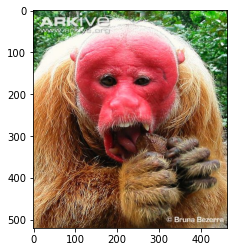

In [12]:
# obtain image
# lookk !!! these are the random pictures
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [13]:
# generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [15]:
# get 10 samples of augmented images
aug_image = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]


# and at the end the Augmeneted images

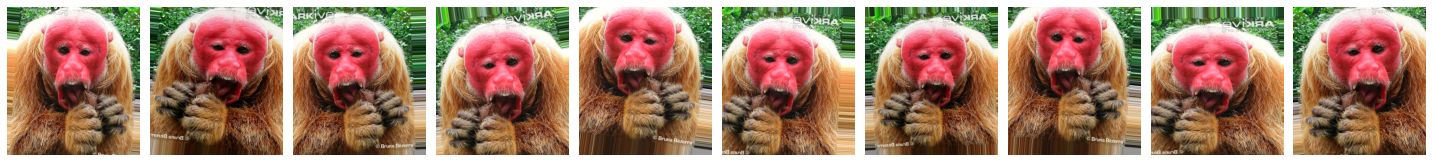

In [16]:
plotImages(aug_image)

####  these are the calculation of RMS models


(1000, 1) (1000, 2) (2, 1)
mse:  6.97286970001607
mse (sklearn):  6.97286970001607


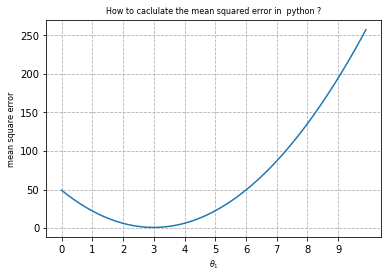

In [21]:
import matplotlib.pyplot as plt
import numpy as np

X = 4 * np.random.rand(1000,1)
X_b = np.c_[np.ones((1000,1)), X]

Y = 2 + 3 * X + np.random.randn(1000,1)

plt.plot(X,Y,'.')

plt.xlim(0,4)
plt.ylim(0,15)

plt.xlabel(r'x',fontsize=8)
plt.ylabel(r'y',fontsize=8)

plt.title('How to caclulate the mean squared error in  python ?',fontsize=8)

plt.savefig("mean_squared_error_01.png", bbox_inches='tight')

#----- Let's take one random linear model

theta = np.array([[-1.4],[5.0]])

X_new = np.array([[0],[4]])
X_new_b = np.c_[np.ones((2,1)), X_new]

plt.plot(X_new, X_new_b.dot( theta ), '-')

plt.xlim(0,4)
plt.ylim(0,15)

plt.xlabel(r'x',fontsize=8)
plt.ylabel(r'y',fontsize=8)

plt.title('How to caclulate the mean squared error in  python ?',fontsize=8)

plt.savefig("mean_squared_error_02.png", bbox_inches='tight')

plt.close()

#----- using python

Y_predict = X_b.dot( theta )

print(Y_predict.shape, X_b.shape, theta.shape)

mse = np.sum( (Y_predict-Y)**2 ) / 1000.0

print('mse: ', mse)

#----- using sklearn

from sklearn.metrics import mean_squared_error

print('mse (sklearn): ', mean_squared_error(Y,Y_predict))

#----- Calculate the mse using a grid search

theta_0, theta_1 = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))

theta = np.vstack((theta_0.ravel(), theta_1.ravel()))

Y_predict = X_b @ theta

mse = np.sum( (Y_predict-Y)**2, axis=0 ) / 1000.0

mse = mse.reshape(100,100)

from matplotlib.colors import LogNorm
from pylab import figure, cm

plt.imshow(mse, origin='lower', norm=LogNorm(), extent=[0,10,0,10], cmap=cm.jet)

plt.title('How to caclulate the mean squared error in  python ?',fontsize=8)

plt.xlabel(r'$\theta_0$',fontsize=8)
plt.ylabel(r'$\theta_1$',fontsize=8)

plt.savefig("mean_squared_error_03.png", bbox_inches='tight')

#plt.show()

plt.close()

#----- plot theta_1 for a given theta_0

plt.plot(mse[:,20])

plt.title('How to caclulate the mean squared error in  python ?',fontsize=8)

plt.xlabel(r'$\theta_1$',fontsize=8)
plt.ylabel(r'mean square error',fontsize=8)

positions = [i*10 for i in range(10)]
labels = [i for i in range(10)]

plt.xticks(positions, labels)

plt.grid(linestyle='--')

plt.savefig("mean_squared_error_04.png", bbox_inches='tight')

#plt.show()

The conclusion is the root mean square might be faster than image data generator beacause the math formula of the image data generator is algebra and it is linear but ROOT MEAN SQUARE IS non-linear function